.. _color:

# Color

Color choices are critical in visualization because good color choices can reveal or emphasize patterns in your data while poor choices will obscure them.

Colors in Toyplot are represented as red-green-blue-alpha (RGBA) tuples, where each component can range from zero (off) to one (full strength).  Alpha is used to represent the opacity of a color, from zero (completely transparent) to one (completely opaque).  There are a variety of functions in Toyplot for creating color tuples.  For example, you can create a color from a set of RGB values:

In [1]:
import toyplot.color
toyplot.color.rgb(1, 0, 0)

array((1.0, 0.0, 0.0, 1.0), 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

Note that in Jupyter notebooks (which we're using to write this documentation), the color tuple is automatically rendered as a swatch.

:func:`toyplot.color.rgb` automatically creates an opaque color with an alpha of one.  Of course, you can specify an alpha value explicitly if you prefer:

In [2]:
toyplot.color.rgba(1, 0, 0, 0.2)

array((1.0, 0.0, 0.0, 0.2), 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

Note that the above is a partially transparent pure red swatch displayed atop the page background, which is *not* the same as an opaque pink swatch.

You can also create colors using alternate specifications, such as CSS:

In [3]:
toyplot.color.css("steelblue")

array((0.27450980392156865, 0.5098039215686274, 0.7058823529411765, 1.0), 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

In [4]:
toyplot.color.css("#acb")

array((0.6666666666666666, 0.8, 0.7333333333333333, 1.0), 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

## Palettes

In practice much of the color management in Toyplot centers around :class:`palette <toyplot.color.Palette>` objects, which store ordered collections of colors.  For example, consider Toyplot's default palette:

In [5]:
toyplot.color.Palette()

You will likely recognize the colors in the default palette, since they are used to provide per-series colors when adding marks to a plot.  Although you can create your own custom palettes by passing a sequence of colors to the :class:`toyplot.color.Palette` constructor, we strongly recommend that you use the high-quality palettes that are provided by Toyplot and outlined in the next section.

## Color Brewer Palettes

Toyplot includes a complete collection of high-quality palettes from [Color Brewer](http://colorbrewer2.org) which are ideal for visualization (we will provide empirical evidence for this in the section on linear color maps) and accessed by name:

In [6]:
from pprint import pprint
pprint(toyplot.color.brewer.names())

['Accent',
 'BlueGreen',
 'BlueGreenBrown',
 'BlueGreenYellow',
 'BluePurple',
 'BlueRed',
 'BlueYellowRed',
 'Blues',
 'BrownOrangeYellow',
 'Dark2',
 'GrayRed',
 'GreenBlue',
 'GreenBluePurple',
 'GreenYellow',
 'GreenYellowRed',
 'Greens',
 'Greys',
 'Oranges',
 'Paired',
 'Pastel1',
 'Pastel2',
 'PinkGreen',
 'PurpleBlue',
 'PurpleGreen',
 'PurpleOrange',
 'PurpleRed',
 'Purples',
 'RedOrange',
 'RedOrangeYellow',
 'RedPurple',
 'Reds',
 'Set1',
 'Set2',
 'Set3',
 'Spectral']


In [7]:
toyplot.color.brewer("BlueYellowRed")

You can also reverse the order of any palette (though this should almost never be necessary, as we will see shortly):

In [8]:
toyplot.color.brewer("BlueYellowRed", reverse=True)

Each of the Color Brewer palettes comes in multiple variants with different numbers of colors.  By default, when you create a Color Brewer palette, the one with the maximum number of colors is returned.  However, you can query for all of the available variants, and request one with fewer colors if necessary:

In [9]:
toyplot.color.brewer.counts("BlueYellowRed")

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [10]:
toyplot.color.brewer("BlueYellowRed", count=5)

Finally, each of the Color Brewer palettes are categorized as "sequential", "diverging", or "qualitative".  Given a palette name, you can lookup its category:

In [11]:
toyplot.color.brewer.category("BlueYellowRed")

'diverging'

Or, you can use the category to lookup matching names:

In [12]:
toyplot.color.brewer.names("diverging")

['BlueGreenBrown',
 'BlueRed',
 'BlueYellowRed',
 'GrayRed',
 'GreenYellowRed',
 'PinkGreen',
 'PurpleGreen',
 'PurpleOrange',
 'Spectral']

## Color Brewer Sequential Palettes

Sequential color palettes are designed to visualize magnitudes for some quantity of interest.  Colors at one end of the palette are mapped to low values and colors at the opposite end map to high values.  Toyplot includes the complete set of Color Brewer sequential palettes, reordered where necessary so that the colors always progress from low luminance to high luminance.  This ensures that colormaps based on these palettes always map low values to low luminance and high values to high luminance (this is why you should never need to reverse a palette).  The names of the palettes have been modified from the originals to eliminate abbreviations:

In [13]:
import IPython.display
for name, palette in toyplot.color.brewer.palettes("sequential"):
    IPython.display.display_html(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(palette)

BlueGreen

BlueGreenYellow

BluePurple

Blues

BrownOrangeYellow

GreenBlue

GreenBluePurple

GreenYellow

Greens

Greys

Oranges

PurpleBlue

PurpleRed

Purples

RedOrange

RedOrangeYellow

RedPurple

Reds

## Color Brewer Diverging Palettes

Diverging palettes are especially useful when visualizing signed magnitudes, or magnitudes relative to some well-defined reference point, such as a mean, median, or domain-specific critical value.  Once again, Toyplot includes the complete set of Color Brewer diverging palettes, reordered so the colors consistently progress from cooler colors to warmer colors, so low/negative values map to cool colors and high/positive values map to warm colors, and renamed for consistency:

In [14]:
for name, palette in toyplot.color.brewer.palettes("diverging"):
    IPython.display.display_html(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(palette)

BlueGreenBrown

BlueRed

BlueYellowRed

GrayRed

GreenYellowRed

PinkGreen

PurpleGreen

PurpleOrange

Spectral

## Color Brewer Qualitative (Categorical) Palettes

Qualitative or categorical palettes are designed for visualizing unordered information.  Adjacent colors typically have high contrast in hue or luminance, to emphasize boundaries between values.  Toyplot includes the full set of qualitative palettes from Color Brewer, without modification:

In [15]:
for name, palette in toyplot.color.brewer.palettes("qualitative"):
    IPython.display.display_html(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(palette)

Accent

Dark2

Paired

Pastel1

Pastel2

Set1

Set2

Set3

You may recognize "Set2" as Toyplot's default color palette.

## Palette Manipulation

Sometimes you'll find yourself needing categorical palettes with more categories than the existing Color Brewer palettes provide.  For these cases, you'll have to create larger palettes on your own, but Toyplot can still help.  First, the :func:`toyplot.color.spread` function can create a family of colors based on a reference color:

In [16]:
toyplot.color.spread("mediumseagreen", lightness=0.9)

In [17]:
toyplot.color.spread("mediumseagreen", lightness=0.2, count=6)

Of course, this isn't an immediate solution, because you can only create so many related colors before they become indistinguishable.  However, Toyplot makes it easy to concatenate palettes:

In [18]:
toyplot.color.spread("mediumseagreen") + toyplot.color.spread("orange") + toyplot.color.spread("steelblue") + toyplot.color.spread("crimson")

Using this approach, you can, within reason, build-up arbitrarily large palettes.  Often, the two-level hierarchy created by the combination of palette hues and lightness can usefully be used to group-together related categories.

## Color Maps

While palettes group together related collections of colors, Toyplot uses *color maps* to perform the real work of mapping data values to colors:

### Categorical Color Maps

The simplest type of color map in Toyplot is a :class:`toyplot.color.CategoricalMap`:

In [19]:
colormap = toyplot.color.CategoricalMap(toyplot.color.brewer("BlueYellowRed", count=5))
colormap

Although the Jupyter preview looks a lot like a palette, a colormap provides additional API to perform the mapping from values to colors.  In the case of a categorical map, data values are used as a zero-based index to lookup colors from the underlying palette (out-of-range values are wrapped so negative values and values larger than the number of colors in the palette are allowed):

In [20]:
colormap.colors([-1, 0, 1, 2, 3, 4, 5])

array([(0.8431372549019608, 0.09803921568627451, 0.10980392156862745, 1.0),
       (0.17254901960784313, 0.4823529411764706, 0.7137254901960784, 1.0),
       (0.6705882352941176, 0.8509803921568627, 0.9137254901960784, 1.0),
       (1.0, 1.0, 0.7490196078431373, 1.0),
       (0.9921568627450981, 0.6823529411764706, 0.3803921568627451, 1.0),
       (0.8431372549019608, 0.09803921568627451, 0.10980392156862745, 1.0),
       (0.17254901960784313, 0.4823529411764706, 0.7137254901960784, 1.0)], 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

Note that floating point values are automatically truncated to integers before performing the categorical map lookup:

In [21]:
colormap.colors([0, 0.25, 0.75, 1, 1.25])

array([(0.17254901960784313, 0.4823529411764706, 0.7137254901960784, 1.0),
       (0.17254901960784313, 0.4823529411764706, 0.7137254901960784, 1.0),
       (0.17254901960784313, 0.4823529411764706, 0.7137254901960784, 1.0),
       (0.6705882352941176, 0.8509803921568627, 0.9137254901960784, 1.0),
       (0.6705882352941176, 0.8509803921568627, 0.9137254901960784, 1.0)], 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

### Linear Color Maps

Probably the most used color map in Toyplot is :class:`toyplot.color.LinearMap`, which uses linear interpolation to map a continuous range of data values to a continuous range of colors, provided by a palette:

In [22]:
toyplot.color.LinearMap(toyplot.color.brewer("BlueYellowRed"))

Note that not all linear interpolations of colors are equal!  Because the human visual system is much more sensitive to changes in luminance than changes in hue, we typically want to use color maps that generate a linear range of luminance values.  For example, the following figure relates the relationship between data values and luminance values for each of the Color Brewer sequential palettes:

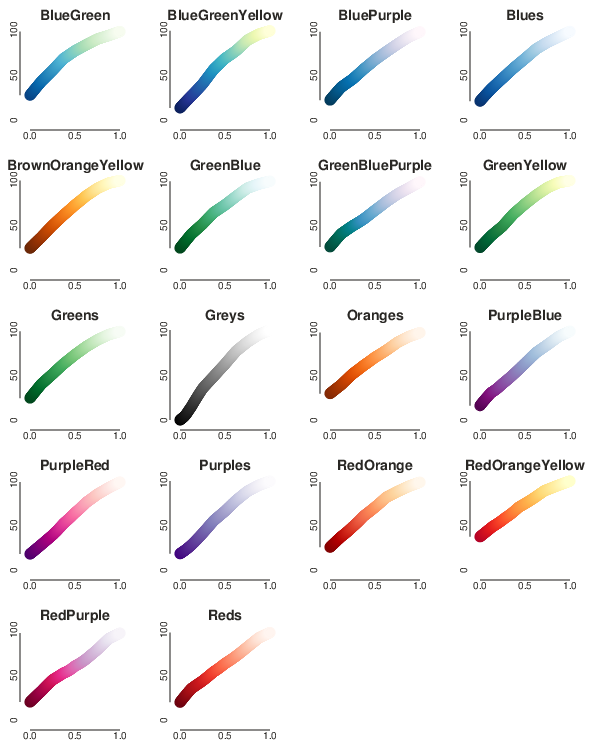

In [23]:
import toyplot.docs
toyplot.docs.plot_luma(toyplot.color.brewer.palettes("sequential"))

And here are the diverging palettes, viewed in the same fashion:

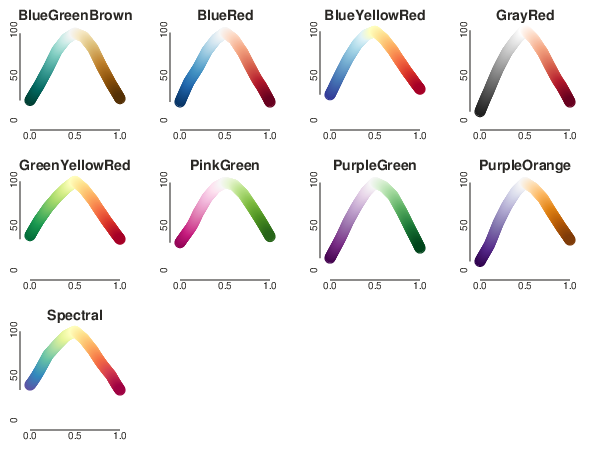

In [24]:
toyplot.docs.plot_luma(toyplot.color.brewer.palettes("diverging"))

Note that for each of the palettes, the relationship between data and luminance is close to linear, minimizing  distortion, and that the diverging palettes provide a crisp transition between negative and positive slopes.  When we say that Color Brewer is a "high quality" set of palettes, this is what we mean - the color choices in the Color Brewer palettes generate close-to-optimal relationships between data and luminance, so a change in luminance that appears linear for the viewer represents a linear change in the underlying data.

As a counterexample, here is the same analysis, applied to a low-quality colormap (mis)used by many mainstream visualization libraries: 

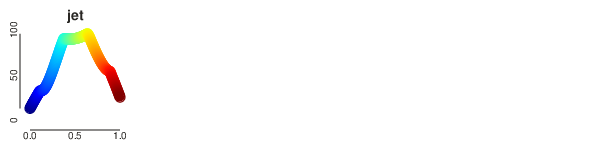

In [25]:
import numpy
jet = toyplot.color.Palette(numpy.load("jet.npy"))
toyplot.docs.plot_luma([("jet", jet)])

Note that this palette provides a complex luminance profile that makes it a poor choice for sequential *or* diverging data.

### Moreland Diverging Maps

As an alternative to the linear maps based on the Color Brewer diverging palettes, Toyplot also provides a set of nonlinear diverging color maps based on “Diverging Color Maps for Scientific Visualization” by Ken Moreland at http://www.sandia.gov/~kmorel/documents/ColorMaps.  You will note in the following plots that the Moreland diverging color maps use a much narrower range of available luminance - this is because they have been carefully crafted to provide a perceptually uniform mapping that takes both color and luminance into account to eliminate Mach banding effects:

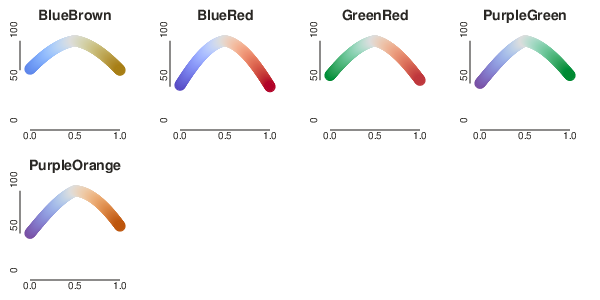

In [26]:
toyplot.docs.plot_luma(toyplot.color.diverging.maps())

## Mapping Data to Color

Of course, the purpose of palettes and color maps is to specify a mapping of data values to colors, and Toyplot's API has been carefully crafted to emphasize this connection between data and map, across a wide range of use-cases.  Consequently, you can specify color mappings in many ways.

To demonstrate, let's start with some sample data containing multiple series:

In [27]:
numpy.random.seed(1234)

samples = numpy.linspace(0, 4 * numpy.pi, 100)
frequency = lambda: numpy.random.normal()
phase = lambda: numpy.random.normal()
amplitude = lambda: numpy.random.uniform(0.1, 1)
wave = lambda: numpy.sin(phase() + (frequency() * samples))
signal = lambda: amplitude() * (2 + wave())
series = numpy.column_stack([signal() for i in range(10)])

Next, we'll display the data without specifying any color information.  By default, Toyplot uses a categorical color map and the default palette to generate per-series colors:

In [28]:
toyplot.fill(series, baseline="stacked", width=600, height=300);

<polygon points="50.0,250.0 55.0,250.0 60.0,250.0 65.0,250.0 70.0,250.0 75.0,250.0 80.0,250.0 85.0,250.0 90.0,250.0 95.0,250.0 100.0,250.0 105.0,250.0 110.0,250.0 115.0,250.0 120.00000000000001,250.0 125.0,250.0 130.0,250.0 135.0,250.0 140.0,250.0 145.0,250.0 150.0,250.0 155.0,250.0 160.0,250.0 165.0,250.0 170.0,250.0 175.0,250.0 180.0,250.0 185.0,250.0 190.00000000000003,250.0 195.0,250.0 200.0,250.0 205.0,250.0 210.0,250.0 215.0,250.0 220.0,250.0 225.0,250.0 230.0,250.0 235.0,250.0 240.0,250.0 245.0,250.0 250.0,250.0 255.0,250.0 260.0,250.0 265.0,250.0 270.0,250.0 275.0,250.0 280.0,250.0 285.0,250.0 290.0,250.0 295.0,250.0 300.0,250.0 305.0,250.0 310.0,250.0 315.0,250.0 320.0,250.0 325.0,250.0 330.00000000000006,250.0 335.0,250.0 340.0,250.0 345.0,250.0 350.0,250.0 355.0,250.0 360.0,250.0 365.0,250.0 370.0,250.0 375.0,250.0 380.0,250.0 385.0,250.0 390.0,250.0 394.99999999999994,250.0 400.0,250.0 405.0,250.0 410.0,250.0 415.0,250.0 420.0,250.0 425.0,250.0 430.0,250.0 435.0,250.0 440.0,250.0 445.0,250.0 450.0,250.0 455.00000000000006,250.0 460.0,250.0 465.0,250.0 470.0,250.0 475.0,250.0 480.0,250.0 485.0,250.0 490.0,250.0 495.0,250.0 500.0,250.0 505.0,250.0 510.0,250.0 515.0,250.0 520.0,250.0 525.0,250.0 530.0,250.0 535.0,250.0 540.0,250.0 545.0,250.0 545.0,243.83311486017777 540.0,244.623333535711 535.0,245.16985301332647 530.0,245.43669886000211 525.0,245.40630605119321 520.0,245.08067518177259 515.0,244.48124077764786 510.0,243.64746037639188 505.0,242.63421725010883 500.0,241.50820773529637 495.0,240.34355097231838 490.0,239.21691004168622 485.0,238.20244564646561 480.0,237.36693451270932 475.0,236.76537383731815 470.0,236.43736111884795 465.0,236.40448766749779 460.0,236.66891736547535 455.00000000000006,237.21324423028864 450.0,238.00163815680426 445.0,238.98220342004601 440.0,240.09039469119909 435.0,241.25326570889015 430.0,242.39427093859976 425.0,243.43830415283688 420.0,244.3166422694849 415.0,244.97146902207518 410.0,245.35968069314285 405.0,245.45572339974089 400.0,245.25327516789167 394.99999999999994,244.76566207407629 390.0,244.02498106140959 385.0,243.07998717078632 380.0,241.99288425919056 375.0,240.83523045489247 370.0,239.68322787135975 365.0,238.61270663264114 360.0,237.6941333848095 355.0,236.98797285626617 350.0,236.54070779040362 345.0,236.38177923701784 340.0,236.52164860660432 335.0,236.95110905206224 330.00000000000006,237.64189150584031 325.0,238.54852548036376 320.0,239.61133214527428 315.0,240.76035266333315 310.0,241.91995320379692 305.0,243.01380351004349 300.0,243.96990130916205 295.0,244.72531183369099 290.0,245.23031047831986 285.0,245.45165590278253 280.0,245.37477813021047 275.0,245.00473761021894 270.0,244.36589211677065 265.0,243.50029340713468 260.0,242.46491918124539 255.0,241.32792254666381 250.0,240.16414586665869 245.0,239.05019429062057 240.0,238.05939324976177 235.0,237.25696183899578 230.0,236.69571979526481 225.0,236.41261065880551 220.0,236.42626997891608 215.0,236.73579863613864 210.0,237.32082202644935 205.0,238.14283121168029 200.0,239.14771775546473 195.0,240.26933539011256 190.00000000000003,241.43385406907154 185.0,242.56461980115722 180.0,243.58720036984522 175.0,244.43428480510661 170.0,245.05011410194976 165.0,245.39415153533594 160.0,245.44375097441102 155.0,245.19564755530089 150.0,244.66617258951209 145.0,243.89017856167482 140.0,242.91874497823557 135.0,241.8158160787215 130.0,240.6539917309303 125.0,239.50974857274045 120.00000000000001,238.45840596703164 115.0,237.5691681337841 110.0,236.90056880909171 105.0,236.49661828464579 100.0,236.38390644732334 95.0,236.56985251017838 90.0,237.04221664561487 85.0,237.76990566729935 80.0,238.70501972711344 75.0,239.78600530411103 70.0,240.94170694120342 65.0,242.09605102557356 60.0,243.17305330478646 55.0,244.10182052078804 50.0,244.82121693116886" style="fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:1.0;stroke:none"> <polygon points="50.0,244.82121693116886 55.0,244.10182052078804 60.0,243.17305330478646 65.0,242.09605

Now that we've seen the default behavior, we can begin to explore the many ways you can override the defaults, using the `color` parameter.  Note that in all of the following examples there are three things that affect how color mapping is performed: the number of series in the plotted data, the cardinality (constant, per-series, or per-datum) of the optional color data you provide, and the optional colormap / palette objects you supply.

### Constant Colors

First - and simplest - you can simply specify a single value, which will be applied to all your data:

In [29]:
toyplot.fill(series, color="steelblue", baseline="stacked", width=600, height=300);

<polygon points="50.0,250.0 55.0,250.0 60.0,250.0 65.0,250.0 70.0,250.0 75.0,250.0 80.0,250.0 85.0,250.0 90.0,250.0 95.0,250.0 100.0,250.0 105.0,250.0 110.0,250.0 115.0,250.0 120.00000000000001,250.0 125.0,250.0 130.0,250.0 135.0,250.0 140.0,250.0 145.0,250.0 150.0,250.0 155.0,250.0 160.0,250.0 165.0,250.0 170.0,250.0 175.0,250.0 180.0,250.0 185.0,250.0 190.00000000000003,250.0 195.0,250.0 200.0,250.0 205.0,250.0 210.0,250.0 215.0,250.0 220.0,250.0 225.0,250.0 230.0,250.0 235.0,250.0 240.0,250.0 245.0,250.0 250.0,250.0 255.0,250.0 260.0,250.0 265.0,250.0 270.0,250.0 275.0,250.0 280.0,250.0 285.0,250.0 290.0,250.0 295.0,250.0 300.0,250.0 305.0,250.0 310.0,250.0 315.0,250.0 320.0,250.0 325.0,250.0 330.00000000000006,250.0 335.0,250.0 340.0,250.0 345.0,250.0 350.0,250.0 355.0,250.0 360.0,250.0 365.0,250.0 370.0,250.0 375.0,250.0 380.0,250.0 385.0,250.0 390.0,250.0 394.99999999999994,250.0 400.0,250.0 405.0,250.0 410.0,250.0 415.0,250.0 420.0,250.0 425.0,250.0 430.0,250.0 435.0,250.0 440.0,250.0 445.0,250.0 450.0,250.0 455.00000000000006,250.0 460.0,250.0 465.0,250.0 470.0,250.0 475.0,250.0 480.0,250.0 485.0,250.0 490.0,250.0 495.0,250.0 500.0,250.0 505.0,250.0 510.0,250.0 515.0,250.0 520.0,250.0 525.0,250.0 530.0,250.0 535.0,250.0 540.0,250.0 545.0,250.0 545.0,243.83311486017777 540.0,244.623333535711 535.0,245.16985301332647 530.0,245.43669886000211 525.0,245.40630605119321 520.0,245.08067518177259 515.0,244.48124077764786 510.0,243.64746037639188 505.0,242.63421725010883 500.0,241.50820773529637 495.0,240.34355097231838 490.0,239.21691004168622 485.0,238.20244564646561 480.0,237.36693451270932 475.0,236.76537383731815 470.0,236.43736111884795 465.0,236.40448766749779 460.0,236.66891736547535 455.00000000000006,237.21324423028864 450.0,238.00163815680426 445.0,238.98220342004601 440.0,240.09039469119909 435.0,241.25326570889015 430.0,242.39427093859976 425.0,243.43830415283688 420.0,244.3166422694849 415.0,244.97146902207518 410.0,245.35968069314285 405.0,245.45572339974089 400.0,245.25327516789167 394.99999999999994,244.76566207407629 390.0,244.02498106140959 385.0,243.07998717078632 380.0,241.99288425919056 375.0,240.83523045489247 370.0,239.68322787135975 365.0,238.61270663264114 360.0,237.6941333848095 355.0,236.98797285626617 350.0,236.54070779040362 345.0,236.38177923701784 340.0,236.52164860660432 335.0,236.95110905206224 330.00000000000006,237.64189150584031 325.0,238.54852548036376 320.0,239.61133214527428 315.0,240.76035266333315 310.0,241.91995320379692 305.0,243.01380351004349 300.0,243.96990130916205 295.0,244.72531183369099 290.0,245.23031047831986 285.0,245.45165590278253 280.0,245.37477813021047 275.0,245.00473761021894 270.0,244.36589211677065 265.0,243.50029340713468 260.0,242.46491918124539 255.0,241.32792254666381 250.0,240.16414586665869 245.0,239.05019429062057 240.0,238.05939324976177 235.0,237.25696183899578 230.0,236.69571979526481 225.0,236.41261065880551 220.0,236.42626997891608 215.0,236.73579863613864 210.0,237.32082202644935 205.0,238.14283121168029 200.0,239.14771775546473 195.0,240.26933539011256 190.00000000000003,241.43385406907154 185.0,242.56461980115722 180.0,243.58720036984522 175.0,244.43428480510661 170.0,245.05011410194976 165.0,245.39415153533594 160.0,245.44375097441102 155.0,245.19564755530089 150.0,244.66617258951209 145.0,243.89017856167482 140.0,242.91874497823557 135.0,241.8158160787215 130.0,240.6539917309303 125.0,239.50974857274045 120.00000000000001,238.45840596703164 115.0,237.5691681337841 110.0,236.90056880909171 105.0,236.49661828464579 100.0,236.38390644732334 95.0,236.56985251017838 90.0,237.04221664561487 85.0,237.76990566729935 80.0,238.70501972711344 75.0,239.78600530411103 70.0,240.94170694120342 65.0,242.09605102557356 60.0,243.17305330478646 55.0,244.10182052078804 50.0,244.82121693116886" style="fill:rgb(27.5%,51%,70.6%);fill-opacity:1.0;opacity:1.0;stroke:none"> <polygon points="50.0,244.82121693116886 55.0,244.10182052078804 60.0,243.17305330478646 65.0,242.09605

Of course, this works best with a single data series. For multiple series as in this example, where a single color obscures the boundaries between series, you could use CSS styles to make the boundaries visible again:

In [30]:
style = {"stroke": "white"}
toyplot.fill(series, color="steelblue", style=style, baseline="stacked", width=600, height=300);

<polygon points="50.0,250.0 55.0,250.0 60.0,250.0 65.0,250.0 70.0,250.0 75.0,250.0 80.0,250.0 85.0,250.0 90.0,250.0 95.0,250.0 100.0,250.0 105.0,250.0 110.0,250.0 115.0,250.0 120.00000000000001,250.0 125.0,250.0 130.0,250.0 135.0,250.0 140.0,250.0 145.0,250.0 150.0,250.0 155.0,250.0 160.0,250.0 165.0,250.0 170.0,250.0 175.0,250.0 180.0,250.0 185.0,250.0 190.00000000000003,250.0 195.0,250.0 200.0,250.0 205.0,250.0 210.0,250.0 215.0,250.0 220.0,250.0 225.0,250.0 230.0,250.0 235.0,250.0 240.0,250.0 245.0,250.0 250.0,250.0 255.0,250.0 260.0,250.0 265.0,250.0 270.0,250.0 275.0,250.0 280.0,250.0 285.0,250.0 290.0,250.0 295.0,250.0 300.0,250.0 305.0,250.0 310.0,250.0 315.0,250.0 320.0,250.0 325.0,250.0 330.00000000000006,250.0 335.0,250.0 340.0,250.0 345.0,250.0 350.0,250.0 355.0,250.0 360.0,250.0 365.0,250.0 370.0,250.0 375.0,250.0 380.0,250.0 385.0,250.0 390.0,250.0 394.99999999999994,250.0 400.0,250.0 405.0,250.0 410.0,250.0 415.0,250.0 420.0,250.0 425.0,250.0 430.0,250.0 435.0,250.0 440.0,250.0 445.0,250.0 450.0,250.0 455.00000000000006,250.0 460.0,250.0 465.0,250.0 470.0,250.0 475.0,250.0 480.0,250.0 485.0,250.0 490.0,250.0 495.0,250.0 500.0,250.0 505.0,250.0 510.0,250.0 515.0,250.0 520.0,250.0 525.0,250.0 530.0,250.0 535.0,250.0 540.0,250.0 545.0,250.0 545.0,243.83311486017777 540.0,244.623333535711 535.0,245.16985301332647 530.0,245.43669886000211 525.0,245.40630605119321 520.0,245.08067518177259 515.0,244.48124077764786 510.0,243.64746037639188 505.0,242.63421725010883 500.0,241.50820773529637 495.0,240.34355097231838 490.0,239.21691004168622 485.0,238.20244564646561 480.0,237.36693451270932 475.0,236.76537383731815 470.0,236.43736111884795 465.0,236.40448766749779 460.0,236.66891736547535 455.00000000000006,237.21324423028864 450.0,238.00163815680426 445.0,238.98220342004601 440.0,240.09039469119909 435.0,241.25326570889015 430.0,242.39427093859976 425.0,243.43830415283688 420.0,244.3166422694849 415.0,244.97146902207518 410.0,245.35968069314285 405.0,245.45572339974089 400.0,245.25327516789167 394.99999999999994,244.76566207407629 390.0,244.02498106140959 385.0,243.07998717078632 380.0,241.99288425919056 375.0,240.83523045489247 370.0,239.68322787135975 365.0,238.61270663264114 360.0,237.6941333848095 355.0,236.98797285626617 350.0,236.54070779040362 345.0,236.38177923701784 340.0,236.52164860660432 335.0,236.95110905206224 330.00000000000006,237.64189150584031 325.0,238.54852548036376 320.0,239.61133214527428 315.0,240.76035266333315 310.0,241.91995320379692 305.0,243.01380351004349 300.0,243.96990130916205 295.0,244.72531183369099 290.0,245.23031047831986 285.0,245.45165590278253 280.0,245.37477813021047 275.0,245.00473761021894 270.0,244.36589211677065 265.0,243.50029340713468 260.0,242.46491918124539 255.0,241.32792254666381 250.0,240.16414586665869 245.0,239.05019429062057 240.0,238.05939324976177 235.0,237.25696183899578 230.0,236.69571979526481 225.0,236.41261065880551 220.0,236.42626997891608 215.0,236.73579863613864 210.0,237.32082202644935 205.0,238.14283121168029 200.0,239.14771775546473 195.0,240.26933539011256 190.00000000000003,241.43385406907154 185.0,242.56461980115722 180.0,243.58720036984522 175.0,244.43428480510661 170.0,245.05011410194976 165.0,245.39415153533594 160.0,245.44375097441102 155.0,245.19564755530089 150.0,244.66617258951209 145.0,243.89017856167482 140.0,242.91874497823557 135.0,241.8158160787215 130.0,240.6539917309303 125.0,239.50974857274045 120.00000000000001,238.45840596703164 115.0,237.5691681337841 110.0,236.90056880909171 105.0,236.49661828464579 100.0,236.38390644732334 95.0,236.56985251017838 90.0,237.04221664561487 85.0,237.76990566729935 80.0,238.70501972711344 75.0,239.78600530411103 70.0,240.94170694120342 65.0,242.09605102557356 60.0,243.17305330478646 55.0,244.10182052078804 50.0,244.82121693116886" style="fill:rgb(27.5%,51%,70.6%);fill-opacity:1.0;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:1.0"> <polygon points="50.0,244.82121693116886 55.0,244.10182052078804 60.0

And as we saw earlier, the color value could be specified in many ways - as RGB or RGBA values, as a CSS color, etc.

### Per-Series Colors

When plotting multiple series, we might want to override the default Toyplot behavior (a categorical map with the default palette) by supplying a color map of our own.  For example, we can create a categorical map with some other palette and pass it to the `color` argument:

In [31]:
palette = toyplot.color.brewer("BlueRed", count=5)
colormap = toyplot.color.CategoricalMap(palette)
colormap

In [32]:
toyplot.fill(series, color=colormap, baseline="stacked", width=600, height=300);

<polygon points="50.0,250.0 55.0,250.0 60.0,250.0 65.0,250.0 70.0,250.0 75.0,250.0 80.0,250.0 85.0,250.0 90.0,250.0 95.0,250.0 100.0,250.0 105.0,250.0 110.0,250.0 115.0,250.0 120.00000000000001,250.0 125.0,250.0 130.0,250.0 135.0,250.0 140.0,250.0 145.0,250.0 150.0,250.0 155.0,250.0 160.0,250.0 165.0,250.0 170.0,250.0 175.0,250.0 180.0,250.0 185.0,250.0 190.00000000000003,250.0 195.0,250.0 200.0,250.0 205.0,250.0 210.0,250.0 215.0,250.0 220.0,250.0 225.0,250.0 230.0,250.0 235.0,250.0 240.0,250.0 245.0,250.0 250.0,250.0 255.0,250.0 260.0,250.0 265.0,250.0 270.0,250.0 275.0,250.0 280.0,250.0 285.0,250.0 290.0,250.0 295.0,250.0 300.0,250.0 305.0,250.0 310.0,250.0 315.0,250.0 320.0,250.0 325.0,250.0 330.00000000000006,250.0 335.0,250.0 340.0,250.0 345.0,250.0 350.0,250.0 355.0,250.0 360.0,250.0 365.0,250.0 370.0,250.0 375.0,250.0 380.0,250.0 385.0,250.0 390.0,250.0 394.99999999999994,250.0 400.0,250.0 405.0,250.0 410.0,250.0 415.0,250.0 420.0,250.0 425.0,250.0 430.0,250.0 435.0,250.0 440.0,250.0 445.0,250.0 450.0,250.0 455.00000000000006,250.0 460.0,250.0 465.0,250.0 470.0,250.0 475.0,250.0 480.0,250.0 485.0,250.0 490.0,250.0 495.0,250.0 500.0,250.0 505.0,250.0 510.0,250.0 515.0,250.0 520.0,250.0 525.0,250.0 530.0,250.0 535.0,250.0 540.0,250.0 545.0,250.0 545.0,243.83311486017777 540.0,244.623333535711 535.0,245.16985301332647 530.0,245.43669886000211 525.0,245.40630605119321 520.0,245.08067518177259 515.0,244.48124077764786 510.0,243.64746037639188 505.0,242.63421725010883 500.0,241.50820773529637 495.0,240.34355097231838 490.0,239.21691004168622 485.0,238.20244564646561 480.0,237.36693451270932 475.0,236.76537383731815 470.0,236.43736111884795 465.0,236.40448766749779 460.0,236.66891736547535 455.00000000000006,237.21324423028864 450.0,238.00163815680426 445.0,238.98220342004601 440.0,240.09039469119909 435.0,241.25326570889015 430.0,242.39427093859976 425.0,243.43830415283688 420.0,244.3166422694849 415.0,244.97146902207518 410.0,245.35968069314285 405.0,245.45572339974089 400.0,245.25327516789167 394.99999999999994,244.76566207407629 390.0,244.02498106140959 385.0,243.07998717078632 380.0,241.99288425919056 375.0,240.83523045489247 370.0,239.68322787135975 365.0,238.61270663264114 360.0,237.6941333848095 355.0,236.98797285626617 350.0,236.54070779040362 345.0,236.38177923701784 340.0,236.52164860660432 335.0,236.95110905206224 330.00000000000006,237.64189150584031 325.0,238.54852548036376 320.0,239.61133214527428 315.0,240.76035266333315 310.0,241.91995320379692 305.0,243.01380351004349 300.0,243.96990130916205 295.0,244.72531183369099 290.0,245.23031047831986 285.0,245.45165590278253 280.0,245.37477813021047 275.0,245.00473761021894 270.0,244.36589211677065 265.0,243.50029340713468 260.0,242.46491918124539 255.0,241.32792254666381 250.0,240.16414586665869 245.0,239.05019429062057 240.0,238.05939324976177 235.0,237.25696183899578 230.0,236.69571979526481 225.0,236.41261065880551 220.0,236.42626997891608 215.0,236.73579863613864 210.0,237.32082202644935 205.0,238.14283121168029 200.0,239.14771775546473 195.0,240.26933539011256 190.00000000000003,241.43385406907154 185.0,242.56461980115722 180.0,243.58720036984522 175.0,244.43428480510661 170.0,245.05011410194976 165.0,245.39415153533594 160.0,245.44375097441102 155.0,245.19564755530089 150.0,244.66617258951209 145.0,243.89017856167482 140.0,242.91874497823557 135.0,241.8158160787215 130.0,240.6539917309303 125.0,239.50974857274045 120.00000000000001,238.45840596703164 115.0,237.5691681337841 110.0,236.90056880909171 105.0,236.49661828464579 100.0,236.38390644732334 95.0,236.56985251017838 90.0,237.04221664561487 85.0,237.76990566729935 80.0,238.70501972711344 75.0,239.78600530411103 70.0,240.94170694120342 65.0,242.09605102557356 60.0,243.17305330478646 55.0,244.10182052078804 50.0,244.82121693116886" style="fill:rgb(1.96%,44.3%,69%);fill-opacity:1.0;opacity:1.0;stroke:none"> <polygon points="50.0,244.82121693116886 55.0,244.10182052078804 60.0,243.17305330478646 65.0,242.09605

When you supply just a colormap to the `color` argument, Toyplot generates a set of implicit color values in the range $[0, N)$ which are mapped to generate $N$ colors for each of the $N$ series in the plot. As we saw earlier, when a categorical map has "used-up" all of the colors in the underlying palette, the colors will be repeated, as we see above.

A good way to avoid this is to use a linear map instead of a categorical map - then, colors will be sampled across the full range of the palette without repetition, and assigned to each series:

In [33]:
colormap = toyplot.color.LinearMap(palette)
colormap

In [34]:
toyplot.fill(series, color=colormap, baseline="stacked", width=600, height=300);

<polygon points="50.0,250.0 55.0,250.0 60.0,250.0 65.0,250.0 70.0,250.0 75.0,250.0 80.0,250.0 85.0,250.0 90.0,250.0 95.0,250.0 100.0,250.0 105.0,250.0 110.0,250.0 115.0,250.0 120.00000000000001,250.0 125.0,250.0 130.0,250.0 135.0,250.0 140.0,250.0 145.0,250.0 150.0,250.0 155.0,250.0 160.0,250.0 165.0,250.0 170.0,250.0 175.0,250.0 180.0,250.0 185.0,250.0 190.00000000000003,250.0 195.0,250.0 200.0,250.0 205.0,250.0 210.0,250.0 215.0,250.0 220.0,250.0 225.0,250.0 230.0,250.0 235.0,250.0 240.0,250.0 245.0,250.0 250.0,250.0 255.0,250.0 260.0,250.0 265.0,250.0 270.0,250.0 275.0,250.0 280.0,250.0 285.0,250.0 290.0,250.0 295.0,250.0 300.0,250.0 305.0,250.0 310.0,250.0 315.0,250.0 320.0,250.0 325.0,250.0 330.00000000000006,250.0 335.0,250.0 340.0,250.0 345.0,250.0 350.0,250.0 355.0,250.0 360.0,250.0 365.0,250.0 370.0,250.0 375.0,250.0 380.0,250.0 385.0,250.0 390.0,250.0 394.99999999999994,250.0 400.0,250.0 405.0,250.0 410.0,250.0 415.0,250.0 420.0,250.0 425.0,250.0 430.0,250.0 435.0,250.0 440.0,250.0 445.0,250.0 450.0,250.0 455.00000000000006,250.0 460.0,250.0 465.0,250.0 470.0,250.0 475.0,250.0 480.0,250.0 485.0,250.0 490.0,250.0 495.0,250.0 500.0,250.0 505.0,250.0 510.0,250.0 515.0,250.0 520.0,250.0 525.0,250.0 530.0,250.0 535.0,250.0 540.0,250.0 545.0,250.0 545.0,243.83311486017777 540.0,244.623333535711 535.0,245.16985301332647 530.0,245.43669886000211 525.0,245.40630605119321 520.0,245.08067518177259 515.0,244.48124077764786 510.0,243.64746037639188 505.0,242.63421725010883 500.0,241.50820773529637 495.0,240.34355097231838 490.0,239.21691004168622 485.0,238.20244564646561 480.0,237.36693451270932 475.0,236.76537383731815 470.0,236.43736111884795 465.0,236.40448766749779 460.0,236.66891736547535 455.00000000000006,237.21324423028864 450.0,238.00163815680426 445.0,238.98220342004601 440.0,240.09039469119909 435.0,241.25326570889015 430.0,242.39427093859976 425.0,243.43830415283688 420.0,244.3166422694849 415.0,244.97146902207518 410.0,245.35968069314285 405.0,245.45572339974089 400.0,245.25327516789167 394.99999999999994,244.76566207407629 390.0,244.02498106140959 385.0,243.07998717078632 380.0,241.99288425919056 375.0,240.83523045489247 370.0,239.68322787135975 365.0,238.61270663264114 360.0,237.6941333848095 355.0,236.98797285626617 350.0,236.54070779040362 345.0,236.38177923701784 340.0,236.52164860660432 335.0,236.95110905206224 330.00000000000006,237.64189150584031 325.0,238.54852548036376 320.0,239.61133214527428 315.0,240.76035266333315 310.0,241.91995320379692 305.0,243.01380351004349 300.0,243.96990130916205 295.0,244.72531183369099 290.0,245.23031047831986 285.0,245.45165590278253 280.0,245.37477813021047 275.0,245.00473761021894 270.0,244.36589211677065 265.0,243.50029340713468 260.0,242.46491918124539 255.0,241.32792254666381 250.0,240.16414586665869 245.0,239.05019429062057 240.0,238.05939324976177 235.0,237.25696183899578 230.0,236.69571979526481 225.0,236.41261065880551 220.0,236.42626997891608 215.0,236.73579863613864 210.0,237.32082202644935 205.0,238.14283121168029 200.0,239.14771775546473 195.0,240.26933539011256 190.00000000000003,241.43385406907154 185.0,242.56461980115722 180.0,243.58720036984522 175.0,244.43428480510661 170.0,245.05011410194976 165.0,245.39415153533594 160.0,245.44375097441102 155.0,245.19564755530089 150.0,244.66617258951209 145.0,243.89017856167482 140.0,242.91874497823557 135.0,241.8158160787215 130.0,240.6539917309303 125.0,239.50974857274045 120.00000000000001,238.45840596703164 115.0,237.5691681337841 110.0,236.90056880909171 105.0,236.49661828464579 100.0,236.38390644732334 95.0,236.56985251017838 90.0,237.04221664561487 85.0,237.76990566729935 80.0,238.70501972711344 75.0,239.78600530411103 70.0,240.94170694120342 65.0,242.09605102557356 60.0,243.17305330478646 55.0,244.10182052078804 50.0,244.82121693116886" style="fill:rgb(1.96%,44.3%,69%);fill-opacity:1.0;opacity:1.0;stroke:none"> <polygon points="50.0,244.82121693116886 55.0,244.10182052078804 60.0,243.17305330478646 65.0,242.09605

If you want more control over the mapping, you can replace the implicit $[0, N)$ values with your own range of $N$ values to be mapped, passing a `(values, colormap)` tuple to `color`:

In [35]:
values = numpy.linspace(0, 1, series.shape[1]) ** 2.5
toyplot.fill(series, color=(values, colormap), baseline="stacked", width=600, height=300);

<polygon points="50.0,250.0 55.0,250.0 60.0,250.0 65.0,250.0 70.0,250.0 75.0,250.0 80.0,250.0 85.0,250.0 90.0,250.0 95.0,250.0 100.0,250.0 105.0,250.0 110.0,250.0 115.0,250.0 120.00000000000001,250.0 125.0,250.0 130.0,250.0 135.0,250.0 140.0,250.0 145.0,250.0 150.0,250.0 155.0,250.0 160.0,250.0 165.0,250.0 170.0,250.0 175.0,250.0 180.0,250.0 185.0,250.0 190.00000000000003,250.0 195.0,250.0 200.0,250.0 205.0,250.0 210.0,250.0 215.0,250.0 220.0,250.0 225.0,250.0 230.0,250.0 235.0,250.0 240.0,250.0 245.0,250.0 250.0,250.0 255.0,250.0 260.0,250.0 265.0,250.0 270.0,250.0 275.0,250.0 280.0,250.0 285.0,250.0 290.0,250.0 295.0,250.0 300.0,250.0 305.0,250.0 310.0,250.0 315.0,250.0 320.0,250.0 325.0,250.0 330.00000000000006,250.0 335.0,250.0 340.0,250.0 345.0,250.0 350.0,250.0 355.0,250.0 360.0,250.0 365.0,250.0 370.0,250.0 375.0,250.0 380.0,250.0 385.0,250.0 390.0,250.0 394.99999999999994,250.0 400.0,250.0 405.0,250.0 410.0,250.0 415.0,250.0 420.0,250.0 425.0,250.0 430.0,250.0 435.0,250.0 440.0,250.0 445.0,250.0 450.0,250.0 455.00000000000006,250.0 460.0,250.0 465.0,250.0 470.0,250.0 475.0,250.0 480.0,250.0 485.0,250.0 490.0,250.0 495.0,250.0 500.0,250.0 505.0,250.0 510.0,250.0 515.0,250.0 520.0,250.0 525.0,250.0 530.0,250.0 535.0,250.0 540.0,250.0 545.0,250.0 545.0,243.83311486017777 540.0,244.623333535711 535.0,245.16985301332647 530.0,245.43669886000211 525.0,245.40630605119321 520.0,245.08067518177259 515.0,244.48124077764786 510.0,243.64746037639188 505.0,242.63421725010883 500.0,241.50820773529637 495.0,240.34355097231838 490.0,239.21691004168622 485.0,238.20244564646561 480.0,237.36693451270932 475.0,236.76537383731815 470.0,236.43736111884795 465.0,236.40448766749779 460.0,236.66891736547535 455.00000000000006,237.21324423028864 450.0,238.00163815680426 445.0,238.98220342004601 440.0,240.09039469119909 435.0,241.25326570889015 430.0,242.39427093859976 425.0,243.43830415283688 420.0,244.3166422694849 415.0,244.97146902207518 410.0,245.35968069314285 405.0,245.45572339974089 400.0,245.25327516789167 394.99999999999994,244.76566207407629 390.0,244.02498106140959 385.0,243.07998717078632 380.0,241.99288425919056 375.0,240.83523045489247 370.0,239.68322787135975 365.0,238.61270663264114 360.0,237.6941333848095 355.0,236.98797285626617 350.0,236.54070779040362 345.0,236.38177923701784 340.0,236.52164860660432 335.0,236.95110905206224 330.00000000000006,237.64189150584031 325.0,238.54852548036376 320.0,239.61133214527428 315.0,240.76035266333315 310.0,241.91995320379692 305.0,243.01380351004349 300.0,243.96990130916205 295.0,244.72531183369099 290.0,245.23031047831986 285.0,245.45165590278253 280.0,245.37477813021047 275.0,245.00473761021894 270.0,244.36589211677065 265.0,243.50029340713468 260.0,242.46491918124539 255.0,241.32792254666381 250.0,240.16414586665869 245.0,239.05019429062057 240.0,238.05939324976177 235.0,237.25696183899578 230.0,236.69571979526481 225.0,236.41261065880551 220.0,236.42626997891608 215.0,236.73579863613864 210.0,237.32082202644935 205.0,238.14283121168029 200.0,239.14771775546473 195.0,240.26933539011256 190.00000000000003,241.43385406907154 185.0,242.56461980115722 180.0,243.58720036984522 175.0,244.43428480510661 170.0,245.05011410194976 165.0,245.39415153533594 160.0,245.44375097441102 155.0,245.19564755530089 150.0,244.66617258951209 145.0,243.89017856167482 140.0,242.91874497823557 135.0,241.8158160787215 130.0,240.6539917309303 125.0,239.50974857274045 120.00000000000001,238.45840596703164 115.0,237.5691681337841 110.0,236.90056880909171 105.0,236.49661828464579 100.0,236.38390644732334 95.0,236.56985251017838 90.0,237.04221664561487 85.0,237.76990566729935 80.0,238.70501972711344 75.0,239.78600530411103 70.0,240.94170694120342 65.0,242.09605102557356 60.0,243.17305330478646 55.0,244.10182052078804 50.0,244.82121693116886" style="fill:rgb(1.96%,44.3%,69%);fill-opacity:1.0;opacity:1.0;stroke:none"> <polygon points="50.0,244.82121693116886 55.0,244.10182052078804 60.0,243.17305330478646 65.0,242.09605

More usefully, you might have some per-series metric that could be mapped to its color.

As a convenient shortcut, you can substitute a palette object anywhere that you would use a color map, and Toyplot will create a categorical map using that palette for you:

In [36]:
palette = toyplot.color.brewer("BlueGreenBrown")
palette

In [37]:
toyplot.fill(series, color=palette, baseline="stacked", width=600, height=300);

<polygon points="50.0,250.0 55.0,250.0 60.0,250.0 65.0,250.0 70.0,250.0 75.0,250.0 80.0,250.0 85.0,250.0 90.0,250.0 95.0,250.0 100.0,250.0 105.0,250.0 110.0,250.0 115.0,250.0 120.00000000000001,250.0 125.0,250.0 130.0,250.0 135.0,250.0 140.0,250.0 145.0,250.0 150.0,250.0 155.0,250.0 160.0,250.0 165.0,250.0 170.0,250.0 175.0,250.0 180.0,250.0 185.0,250.0 190.00000000000003,250.0 195.0,250.0 200.0,250.0 205.0,250.0 210.0,250.0 215.0,250.0 220.0,250.0 225.0,250.0 230.0,250.0 235.0,250.0 240.0,250.0 245.0,250.0 250.0,250.0 255.0,250.0 260.0,250.0 265.0,250.0 270.0,250.0 275.0,250.0 280.0,250.0 285.0,250.0 290.0,250.0 295.0,250.0 300.0,250.0 305.0,250.0 310.0,250.0 315.0,250.0 320.0,250.0 325.0,250.0 330.00000000000006,250.0 335.0,250.0 340.0,250.0 345.0,250.0 350.0,250.0 355.0,250.0 360.0,250.0 365.0,250.0 370.0,250.0 375.0,250.0 380.0,250.0 385.0,250.0 390.0,250.0 394.99999999999994,250.0 400.0,250.0 405.0,250.0 410.0,250.0 415.0,250.0 420.0,250.0 425.0,250.0 430.0,250.0 435.0,250.0 440.0,250.0 445.0,250.0 450.0,250.0 455.00000000000006,250.0 460.0,250.0 465.0,250.0 470.0,250.0 475.0,250.0 480.0,250.0 485.0,250.0 490.0,250.0 495.0,250.0 500.0,250.0 505.0,250.0 510.0,250.0 515.0,250.0 520.0,250.0 525.0,250.0 530.0,250.0 535.0,250.0 540.0,250.0 545.0,250.0 545.0,243.83311486017777 540.0,244.623333535711 535.0,245.16985301332647 530.0,245.43669886000211 525.0,245.40630605119321 520.0,245.08067518177259 515.0,244.48124077764786 510.0,243.64746037639188 505.0,242.63421725010883 500.0,241.50820773529637 495.0,240.34355097231838 490.0,239.21691004168622 485.0,238.20244564646561 480.0,237.36693451270932 475.0,236.76537383731815 470.0,236.43736111884795 465.0,236.40448766749779 460.0,236.66891736547535 455.00000000000006,237.21324423028864 450.0,238.00163815680426 445.0,238.98220342004601 440.0,240.09039469119909 435.0,241.25326570889015 430.0,242.39427093859976 425.0,243.43830415283688 420.0,244.3166422694849 415.0,244.97146902207518 410.0,245.35968069314285 405.0,245.45572339974089 400.0,245.25327516789167 394.99999999999994,244.76566207407629 390.0,244.02498106140959 385.0,243.07998717078632 380.0,241.99288425919056 375.0,240.83523045489247 370.0,239.68322787135975 365.0,238.61270663264114 360.0,237.6941333848095 355.0,236.98797285626617 350.0,236.54070779040362 345.0,236.38177923701784 340.0,236.52164860660432 335.0,236.95110905206224 330.00000000000006,237.64189150584031 325.0,238.54852548036376 320.0,239.61133214527428 315.0,240.76035266333315 310.0,241.91995320379692 305.0,243.01380351004349 300.0,243.96990130916205 295.0,244.72531183369099 290.0,245.23031047831986 285.0,245.45165590278253 280.0,245.37477813021047 275.0,245.00473761021894 270.0,244.36589211677065 265.0,243.50029340713468 260.0,242.46491918124539 255.0,241.32792254666381 250.0,240.16414586665869 245.0,239.05019429062057 240.0,238.05939324976177 235.0,237.25696183899578 230.0,236.69571979526481 225.0,236.41261065880551 220.0,236.42626997891608 215.0,236.73579863613864 210.0,237.32082202644935 205.0,238.14283121168029 200.0,239.14771775546473 195.0,240.26933539011256 190.00000000000003,241.43385406907154 185.0,242.56461980115722 180.0,243.58720036984522 175.0,244.43428480510661 170.0,245.05011410194976 165.0,245.39415153533594 160.0,245.44375097441102 155.0,245.19564755530089 150.0,244.66617258951209 145.0,243.89017856167482 140.0,242.91874497823557 135.0,241.8158160787215 130.0,240.6539917309303 125.0,239.50974857274045 120.00000000000001,238.45840596703164 115.0,237.5691681337841 110.0,236.90056880909171 105.0,236.49661828464579 100.0,236.38390644732334 95.0,236.56985251017838 90.0,237.04221664561487 85.0,237.76990566729935 80.0,238.70501972711344 75.0,239.78600530411103 70.0,240.94170694120342 65.0,242.09605102557356 60.0,243.17305330478646 55.0,244.10182052078804 50.0,244.82121693116886" style="fill:rgb(0%,23.5%,18.8%);fill-opacity:1.0;opacity:1.0;stroke:none"> <polygon points="50.0,244.82121693116886 55.0,244.10182052078804 60.0,243.17305330478646 65.0,242.096051

Finally, for complete control over color, you can bypass the mapping entirely, and provide a sequence of explicit color values, one per series.  One case where this is useful is if you wanted to highlight a "special" series in your data.  Rather than create an explicit array of per-series colors from scratch, you can use :func:`toyplot.color.broadcast`:

In [38]:
colors = toyplot.color.broadcast(palette, shape=series.shape[1])

The :func:`toyplot.color.broadcast` function is used internally by Toyplot to implement the logic for mapping values to colors for varying data shapes, and returns a numpy array of RGBA colors when called.  This allows us to generate the same set of colors as in the previous example.  Then, we can manually modify the colors to suit our needs:

In [39]:
colors[2] = toyplot.color.css("rgb(255, 235, 10)")

Finally, we pass the explicit list of colors to the `color` argument when plotting the data:

In [40]:
toyplot.fill(series, color=colors, baseline="stacked", width=600, height=300);

<polygon points="50.0,250.0 55.0,250.0 60.0,250.0 65.0,250.0 70.0,250.0 75.0,250.0 80.0,250.0 85.0,250.0 90.0,250.0 95.0,250.0 100.0,250.0 105.0,250.0 110.0,250.0 115.0,250.0 120.00000000000001,250.0 125.0,250.0 130.0,250.0 135.0,250.0 140.0,250.0 145.0,250.0 150.0,250.0 155.0,250.0 160.0,250.0 165.0,250.0 170.0,250.0 175.0,250.0 180.0,250.0 185.0,250.0 190.00000000000003,250.0 195.0,250.0 200.0,250.0 205.0,250.0 210.0,250.0 215.0,250.0 220.0,250.0 225.0,250.0 230.0,250.0 235.0,250.0 240.0,250.0 245.0,250.0 250.0,250.0 255.0,250.0 260.0,250.0 265.0,250.0 270.0,250.0 275.0,250.0 280.0,250.0 285.0,250.0 290.0,250.0 295.0,250.0 300.0,250.0 305.0,250.0 310.0,250.0 315.0,250.0 320.0,250.0 325.0,250.0 330.00000000000006,250.0 335.0,250.0 340.0,250.0 345.0,250.0 350.0,250.0 355.0,250.0 360.0,250.0 365.0,250.0 370.0,250.0 375.0,250.0 380.0,250.0 385.0,250.0 390.0,250.0 394.99999999999994,250.0 400.0,250.0 405.0,250.0 410.0,250.0 415.0,250.0 420.0,250.0 425.0,250.0 430.0,250.0 435.0,250.0 440.0,250.0 445.0,250.0 450.0,250.0 455.00000000000006,250.0 460.0,250.0 465.0,250.0 470.0,250.0 475.0,250.0 480.0,250.0 485.0,250.0 490.0,250.0 495.0,250.0 500.0,250.0 505.0,250.0 510.0,250.0 515.0,250.0 520.0,250.0 525.0,250.0 530.0,250.0 535.0,250.0 540.0,250.0 545.0,250.0 545.0,243.83311486017777 540.0,244.623333535711 535.0,245.16985301332647 530.0,245.43669886000211 525.0,245.40630605119321 520.0,245.08067518177259 515.0,244.48124077764786 510.0,243.64746037639188 505.0,242.63421725010883 500.0,241.50820773529637 495.0,240.34355097231838 490.0,239.21691004168622 485.0,238.20244564646561 480.0,237.36693451270932 475.0,236.76537383731815 470.0,236.43736111884795 465.0,236.40448766749779 460.0,236.66891736547535 455.00000000000006,237.21324423028864 450.0,238.00163815680426 445.0,238.98220342004601 440.0,240.09039469119909 435.0,241.25326570889015 430.0,242.39427093859976 425.0,243.43830415283688 420.0,244.3166422694849 415.0,244.97146902207518 410.0,245.35968069314285 405.0,245.45572339974089 400.0,245.25327516789167 394.99999999999994,244.76566207407629 390.0,244.02498106140959 385.0,243.07998717078632 380.0,241.99288425919056 375.0,240.83523045489247 370.0,239.68322787135975 365.0,238.61270663264114 360.0,237.6941333848095 355.0,236.98797285626617 350.0,236.54070779040362 345.0,236.38177923701784 340.0,236.52164860660432 335.0,236.95110905206224 330.00000000000006,237.64189150584031 325.0,238.54852548036376 320.0,239.61133214527428 315.0,240.76035266333315 310.0,241.91995320379692 305.0,243.01380351004349 300.0,243.96990130916205 295.0,244.72531183369099 290.0,245.23031047831986 285.0,245.45165590278253 280.0,245.37477813021047 275.0,245.00473761021894 270.0,244.36589211677065 265.0,243.50029340713468 260.0,242.46491918124539 255.0,241.32792254666381 250.0,240.16414586665869 245.0,239.05019429062057 240.0,238.05939324976177 235.0,237.25696183899578 230.0,236.69571979526481 225.0,236.41261065880551 220.0,236.42626997891608 215.0,236.73579863613864 210.0,237.32082202644935 205.0,238.14283121168029 200.0,239.14771775546473 195.0,240.26933539011256 190.00000000000003,241.43385406907154 185.0,242.56461980115722 180.0,243.58720036984522 175.0,244.43428480510661 170.0,245.05011410194976 165.0,245.39415153533594 160.0,245.44375097441102 155.0,245.19564755530089 150.0,244.66617258951209 145.0,243.89017856167482 140.0,242.91874497823557 135.0,241.8158160787215 130.0,240.6539917309303 125.0,239.50974857274045 120.00000000000001,238.45840596703164 115.0,237.5691681337841 110.0,236.90056880909171 105.0,236.49661828464579 100.0,236.38390644732334 95.0,236.56985251017838 90.0,237.04221664561487 85.0,237.76990566729935 80.0,238.70501972711344 75.0,239.78600530411103 70.0,240.94170694120342 65.0,242.09605102557356 60.0,243.17305330478646 55.0,244.10182052078804 50.0,244.82121693116886" style="fill:rgb(0%,23.5%,18.8%);fill-opacity:1.0;opacity:1.0;stroke:none"> <polygon points="50.0,244.82121693116886 55.0,244.10182052078804 60.0,243.17305330478646 65.0,242.096051

Of course, you are free to generate color data from scratch, as a numpy array of CSS color strings, or a list containing an arbitrary sequence of CSS color strings, RGB, and RGBA tuples. This is useful when you have an explicit color scheme dictated by your data and you don't wish to create a Toyplot palette to match.  For example:

In [41]:
colors = ["crimson", "mediumseagreen", "royalblue"]
toyplot.fill(series[:,:3], color=colors, baseline="stacked", width=600, height=300);

<polygon points="50.0,250.0 55.0,250.0 60.0,250.0 65.0,250.0 70.0,250.0 75.0,250.0 80.0,250.0 85.0,250.0 90.0,250.0 95.0,250.0 100.0,250.0 105.0,250.0 110.0,250.0 115.0,250.0 120.00000000000001,250.0 125.0,250.0 130.0,250.0 135.0,250.0 140.0,250.0 145.0,250.0 150.0,250.0 155.0,250.0 160.0,250.0 165.0,250.0 170.0,250.0 175.0,250.0 180.0,250.0 185.0,250.0 190.00000000000003,250.0 195.0,250.0 200.0,250.0 205.0,250.0 210.0,250.0 215.0,250.0 220.0,250.0 225.0,250.0 230.0,250.0 235.0,250.0 240.0,250.0 245.0,250.0 250.0,250.0 255.0,250.0 260.0,250.0 265.0,250.0 270.0,250.0 275.0,250.0 280.0,250.0 285.0,250.0 290.0,250.0 295.0,250.0 300.0,250.0 305.0,250.0 310.0,250.0 315.0,250.0 320.0,250.0 325.0,250.0 330.00000000000006,250.0 335.0,250.0 340.0,250.0 345.0,250.0 350.0,250.0 355.0,250.0 360.0,250.0 365.0,250.0 370.0,250.0 375.0,250.0 380.0,250.0 385.0,250.0 390.0,250.0 394.99999999999994,250.0 400.0,250.0 405.0,250.0 410.0,250.0 415.0,250.0 420.0,250.0 425.0,250.0 430.0,250.0 435.0,250.0 440.0,250.0 445.0,250.0 450.0,250.0 455.00000000000006,250.0 460.0,250.0 465.0,250.0 470.0,250.0 475.0,250.0 480.0,250.0 485.0,250.0 490.0,250.0 495.0,250.0 500.0,250.0 505.0,250.0 510.0,250.0 515.0,250.0 520.0,250.0 525.0,250.0 530.0,250.0 535.0,250.0 540.0,250.0 545.0,250.0 545.0,231.64494229829057 540.0,233.99694157467056 535.0,235.62359689892227 530.0,236.41783431410687 525.0,236.32737344986887 520.0,235.35816885757365 515.0,233.57401805426932 510.0,231.09236207582691 505.0,228.07655496622303 500.0,224.72511106083971 495.0,221.25863785719511 490.0,217.90531461183031 485.0,214.88587252909025 480.0,212.39906521505625 475.0,210.60858579837577 470.0,209.63229189344523 465.0,209.53444766857223 460.0,210.3214936819773 455.00000000000006,211.94162293454295 450.0,214.28819104547239 445.0,217.20673607736714 440.0,220.50514593345412 435.0,223.96630406197735 430.0,227.36238106915772 425.0,230.4698315008315 420.0,233.08410863542235 415.0,235.03312869269618 410.0,236.18859818197055 405.0,236.47445877146851 400.0,235.87189379856085 394.99999999999994,234.42056686929868 390.0,232.21601101690121 385.0,229.40334027683087 380.0,226.16769761159193 375.0,222.72206794690399 370.0,219.2932585214262 365.0,216.10696938808391 360.0,213.37293679546741 355.0,211.2711273804706 350.0,209.93989193409362 345.0,209.46685851418968 340.0,209.88316436248311 335.0,211.16140630768808 330.00000000000006,213.21744456864889 325.0,215.91594122285889 320.0,219.07926877281173 315.0,222.49920240725373 310.0,225.9506263187682 305.0,229.2063518646419 300.0,232.05207217131277 295.0,234.30046880135069 290.0,235.80354191707849 285.0,236.46235231258703 280.0,236.23353404865867 275.0,235.13214899892668 270.0,233.23069540787458 265.0,230.65433572196167 260.0,227.57265782004302 255.0,224.18851195690212 250.0,220.72465822376552 245.0,217.40910345154231 240.0,214.46009274945538 235.0,212.07174360522299 230.0,210.40126817658469 225.0,209.55862486188514 220.0,209.5992803310744 215.0,210.52055845363338 210.0,212.26181645382903 205.0,214.70843669794843 200.0,217.69937135566235 195.0,221.03774331110463 190.00000000000003,224.50380552280109 185.0,227.86940578759643 180.0,230.91300477109496 175.0,233.43425874857562 170.0,235.26720715310589 165.0,236.29119686560665 160.0,236.43882415970307 155.0,235.70037152591698 150.0,234.12444732296612 145.0,231.81478615137087 140.0,228.92342056353704 135.0,225.64067357985525 130.0,222.18263074956948 125.0,218.77691640315854 120.00000000000001,215.64771036890971 115.0,213.00099142251594 110.0,211.01097881391297 105.0,209.80866435260373 100.0,209.47318992251272 95.0,210.02663799811748 90.0,211.43257807411575 85.0,213.59846468933236 80.0,216.38172919587092 75.0,219.59916428516442 70.0,223.03898353813059 65.0,226.47476218421235 60.0,229.68034142423622 55.0,232.44471524580803 50.0,234.58591981238493" style="fill:rgb(86.3%,7.84%,23.5%);fill-opacity:1.0;opacity:1.0;stroke:none"> <polygon points="50.0,234.58591981238493 55.0,232.44471524580803 60.0,229.68034142423622 65.0,226.474

### Per-Datum Colors

For those plot types that support it, you can supply per-datum values and colormaps:

In [42]:
values = series
toyplot.bars(series, color=(values, colormap), baseline="stacked", width=600, height=300);

<rect class="toyplot-Datum" height="8.689911510468562" style="fill:rgb(39.2%,66.5%,81.2%);fill-opacity:1.0;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:1.0;stroke-width:1.0" widt

Note that Toyplot distinguishes between per-series and per-datum colors based on the shape of the array containing the colors or values to be mapped ... use an array of $N$ values to specify per-series colors as we saw in the previous section, or an $M \times N$ matrix to specify per-datum colors.  This applies whether we are mapping scalars or supplying explicit colors:

In [43]:
colors = toyplot.color.broadcast((values, colormap), shape=series.shape)

As before, we used :func:`toyplot.color.broadcast` to create a matrix containing explicit, per-datum colors.  Let's use the color array to highlight the ten largest values in the data:

In [44]:
order = numpy.argsort(values, axis=None)
colors.flat[order[-10:]] = toyplot.color.css("yellow")

In [45]:
toyplot.bars(series, color=colors, baseline="stacked", width=600, height=300);

<rect class="toyplot-Datum" height="8.689911510468562" style="fill:rgb(39.2%,66.5%,81.2%);fill-opacity:1.0;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:1.0;stroke-width:1.0" width="4.9751243781094558" x="323.6318407960199" y="